In [3]:
from pathlib import Path

ROOT = Path(globals()['__vsc_ipynb_file__']).parent.parent
print(ROOT)

import sys
sys.path.append(str(ROOT))

/Users/gabrieleagliardi/Documents/GitHub/Client-Vanguard-Optimization


In [4]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2

In [5]:
from _experiments.doe import doe
from src.step_1 import problem_mapping

In [6]:
my_doe = doe['1/109bonds/TwoLocal2rep_piby3_AerSimulator_0.1']

my_doe['device'] = 'ibm_kyiv'

In [7]:
obj_fn, ansatz_, theta_initial_, backend = problem_mapping(my_doe['lp_file'].replace('.lp','-nocplexvars.lp'),
                                                               my_doe['ansatz'], my_doe['ansatz_params'], my_doe['theta_initial'], my_doe['device'],
                                                               'vanguard/internal/default')

109 23


In [8]:
isa_ansatz = generate_preset_pass_manager(target=backend.target, optimization_level=3).run(ansatz_)

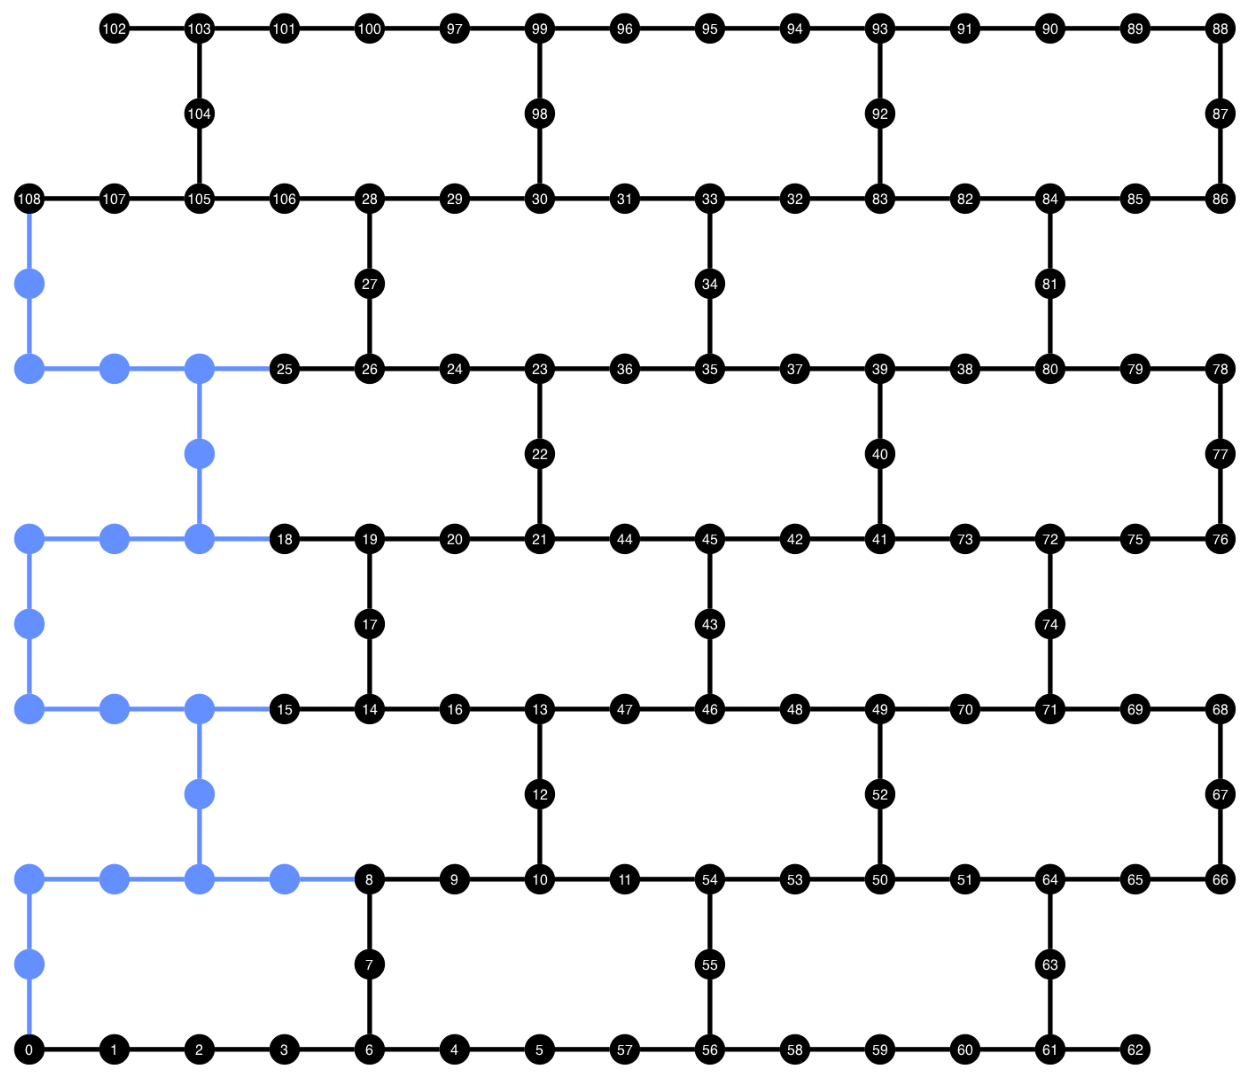

In [9]:
from qiskit.visualization import plot_circuit_layout
plot_circuit_layout(isa_ansatz, backend)

In [10]:
# sampler = SamplerV2(mode=backend)
# sampler.options.default_shots = 10**3

In [11]:
# job = sampler.run([(isa_ansatz, [0]*isa_ansatz.num_parameters)])
# job.job_id()

In [12]:
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService()

In [13]:
job = service.job('czdypgthfwp00088j7r0')

In [14]:
res = job.result()

In [15]:
counts: dict = res[0].data.meas.get_counts()

In [16]:
import numpy as np

In [17]:
aggregate_counts = np.zeros(109)

for qubit in range(109):
    for key, c in counts.items():
        if key[qubit] == '1':
            aggregate_counts[qubit] += c

<BarContainer object of 109 artists>

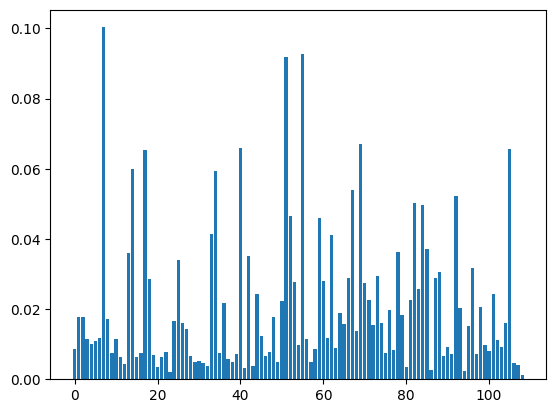

In [19]:
import matplotlib.pyplot as plt

plt.bar(range(109), aggregate_counts/2**13)